# What makes a high rating score on IMDb?  - Final Project Proposal

## TEAM NAME:  
Team MRP(Movie Rating Predictors)

## TEAM MEMBERS: 
Shuibenyang Yuan A14031016<br>
Meliza Ramos Suarez A12604036<br>
Sutianyi Wen A13992949<br>
Froilan Grepo A15714684<br>
Cristina Ahamad A13869848<br>

# DATA SCIENCE QUESTION(S): 
According to the data from “The statistic Portal”, the global box office revenue will reach 50 billion U.S. dollar in 2020 and 19% Americans go to movie theatres once a month. Because of the film industry's prosperity in recent years, there are nearly 2000 movies made worldwide each year. As a group of movie fans, we usually find that there are many boring movies existing in the market and we often need to check the IMDb rating score before buying the ticket. But how are the rating scores calculated? What kind of movies are more likely to have higher rating scores on IMDb? And is the movie worth-watching if it has a rating over 6? By searching some related topics online, we find that Sun Chuan give some interesting insights about rating scores prediction, such as the longer the movie is ,the higher the rating will be. Therefore, we want to look into the movies dataset and get more insights about what affects the IMDb rating scores.

# Hypothesis: (will be change based on features)
After the first meeting, we come out some factors that may influence the ratings.<br>
### The director of the movie<br>
    -The more famous the director is, the higher the rating will be<br>
    -The larger number of the directors is, the higher the rating will be<br>
    -The more experienced the director is, the higher the rating will be<br>
### The color of the poster<br>
    -The movies with light colors on posters are more likely to have a higher rating score than those with dark colors on posters.<br>
### Advertisement strategies<br>
    -How do producers advertise their movies will affect the rating score.<br>
    -High exposure to media online tend to lead a rating score.<br>
### The budget of the movie<br>
    -The higher the budget is, the higher the rating score will be.<br>
### The genre of the movie<br>
    -Sci-fi movies are more likely to have higher ratings than Romance movies.<br>


## Background & Introduction:
The dataset that we will be examining for this project consists of a collection of thousands of movies over a span of 100 years from 66 different countries. The data collected from these movies were used to determine how movie ratings are created through an abundant number of different ways such as social media, advertisement, the actors who are involved in the movie and many other things were analyzed as well. Through this dataset our group was able to analyze the different input that is taken from social media, advertisements, and all the different categories that are used to rate movies in order to come up with an overall rating for these movies.
 A similar project that our group found was “IMDB Exploratory Data Analysis Project” by Ilya Ezepov. Ezepov’s dataset project is very similar to the path our group has decided to take because Ezepov also explores movie ratings through a number of different categories but instead of figuring the exact movie rating through these categories, Ezepov takes a different approach of predicting movie ratings through movie characteristics and the overall production budget. Some of Ezepov’s findings consisted of sound and color being a huge hit in the movie industry, political and economical events impact the audience's movie choices, and economic events also impact the amount of views per movie. 
	In addition, another similar project that we found was “Movie Exploratory Analysis Using IMDB Datasets” by Yash Sharma. Sharma’s project explores the ideas of which country produces the most movies and what kind of movies are produced the most. Sharma’s project examines a similar dataset as the one our group has decided to analyze but takes a different approach while analyzing it. Some of the insights that Sharma was able to collect through the dataset used for his project consisted of Drama, Comedy, and Thriller are the top genres and that the US has the most thriving movie industry. Both of these projects are very similar to the approach our group has decided to take and can be a great resource for the creation of our final project. 
    
    References Link:
IMDB Exploratory Data Analysis Project - Ilya Ezepov:
http://rstudio-pubs-static.s3.amazonaws.com/52740_40aabe898b7a46b99c2b3f4ca3042e8a.html
Movie Exploratory Analysis Using IMDB Datasets - Yash Sharma: 
https://rpubs.com/yash91sharma/dw_project_ys



## ETHICAL CONSIDERATIONS: 
### Permission to the dataset:
The dataset we will use is allowed for public access. The dataset is from data.world which is an open source dataset website. The dataset is provided by Chuan Sun who scraped tons of metadata using a combination of www.the-numbers.com, IMDB.com, and a Python library called "scrapy".
### Privacy Concern: 
Although the dataset we use is completely public, we still have our privacy concerns regarding our dataset. For instance, the dataset reveals 2399 unique director names, thousands of actors/actresses and the number of likes on their Facebooks. In this case, we decide to comply with the Safe Harbor Method and anonymize our dataset.
### Potential Biases:
One of the potential biases of the dataset is the countries of the movies. Since the dataset only contains the information about 66 countries, it can only apply to the IMDB score over those countries. 
Another potential bias of the dataset is that the IMDB scores are only by the preference of users in English-speaking countries. The IMDB score itself can only represent the rating of movies with English-speaking users. 


## Data:
Dataset Name: IMDB 5000 Movie Dataset<br>
Dataset Link: https://data.world/popculture/imdb-5000-movie-dataset<br>
Number of Observations: 5043<br>
Number of Features: 29<br>
Dataset Description:<br>
This dataset shows there are many influential factors towards the IMDB rating of each movie. With 29 variables and 5043 describing (almost) every aspect of IMDB rating of different movies spanning across 100 years and 66 countries. There are 2399 unique director names, and thousands of actors/actresses. 

## Import necessary libraries

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
# from scipy.stats import ttest_ind, chisquare, normaltest, norm
# from matplotlib.gridspec import GridSpec
# from sklearn.cluster import KMeans
# from scipy.cluster.vq import whiten

## Data Parsing

In [12]:
raw_data = pd.read_csv('movie_metadata.csv')

In [13]:
raw_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [14]:
raw_data.movie_facebook_likes

0        33000
1            0
2        85000
3       164000
4            0
5        24000
6            0
7        29000
8       118000
9        10000
10      197000
11           0
12           0
13        5000
14       48000
15      118000
16           0
17      123000
18       58000
19       40000
20       65000
21       56000
22       17000
23       83000
24           0
25           0
26       26000
27       72000
28       44000
29      150000
         ...  
5013        61
5014         0
5015      2000
5016        33
5017       200
5018       725
5019         0
5020        33
5021       297
5022        45
5023       324
5024       835
5025         0
5026       171
5027       697
5028       105
5029       817
5030        22
5031       424
5032        20
5033     19000
5034        74
5035         0
5036         4
5037       413
5038        84
5039     32000
5040        16
5041       660
5042       456
Name: movie_facebook_likes, Length: 5043, dtype: int64

In [15]:
data_column_type = pd.Series({'color' : 'categorical',
 'director_name': 'nominal',
 'num_critic_for_reviews' : 'numerical', 
 'duration': 'numerical',
'director_facebook_likes' : 'numerical', 
 'actor_3_facebook_likes': 'numerical',
 'actor_2_name': 'nominal',
'actor_1_facebook_likes': 'numerical',
 'gross': 'numerical',
 'genres':'categorical',
 'actor_1_name': 'nominal',
'movie_title': 'nominal',
 'num_voted_users': 'numerical',
 'cast_total_facebook_likes': 'numerical',
'actor_3_name': 'categorical',
 'facenumber_in_poster': 'numerical',
 'plot_keywords': 'nominal',
'movie_imdb_link': 'nominal', 
 'num_user_for_reviews': 'numerical', 
 'language' : 'categorical',
 'country': 'categorical',
'content_rating': 'ordinal',
 'budget': 'numerical', 
 'title_year': 'ordinal', 
 'actor_2_facebook_likes': 'numerical',
'imdb_score': 'ordinal', 
 'aspect_ratio' : 'categorical',
 'movie_facebook_likes' : 'numerical'}, name = 'type of data')

In [16]:
data_column_type.to_frame()

,type of data
color,categorical
director_name,nominal
num_critic_for_reviews,numerical
duration,numerical
director_facebook_likes,numerical
actor_3_facebook_likes,numerical
actor_2_name,nominal
actor_1_facebook_likes,numerical
gross,numerical
genres,categorical


In [17]:
# Note that our target data is imdb_score

In [18]:
raw_data['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [19]:
sns.distplot(raw_data['imdb_score'], fit=norm)

NameError: name 'norm' is not defined

In [20]:
# Frome the distribution, we can see the distribution of imdb_score rating is normally distributed from 2 - 10

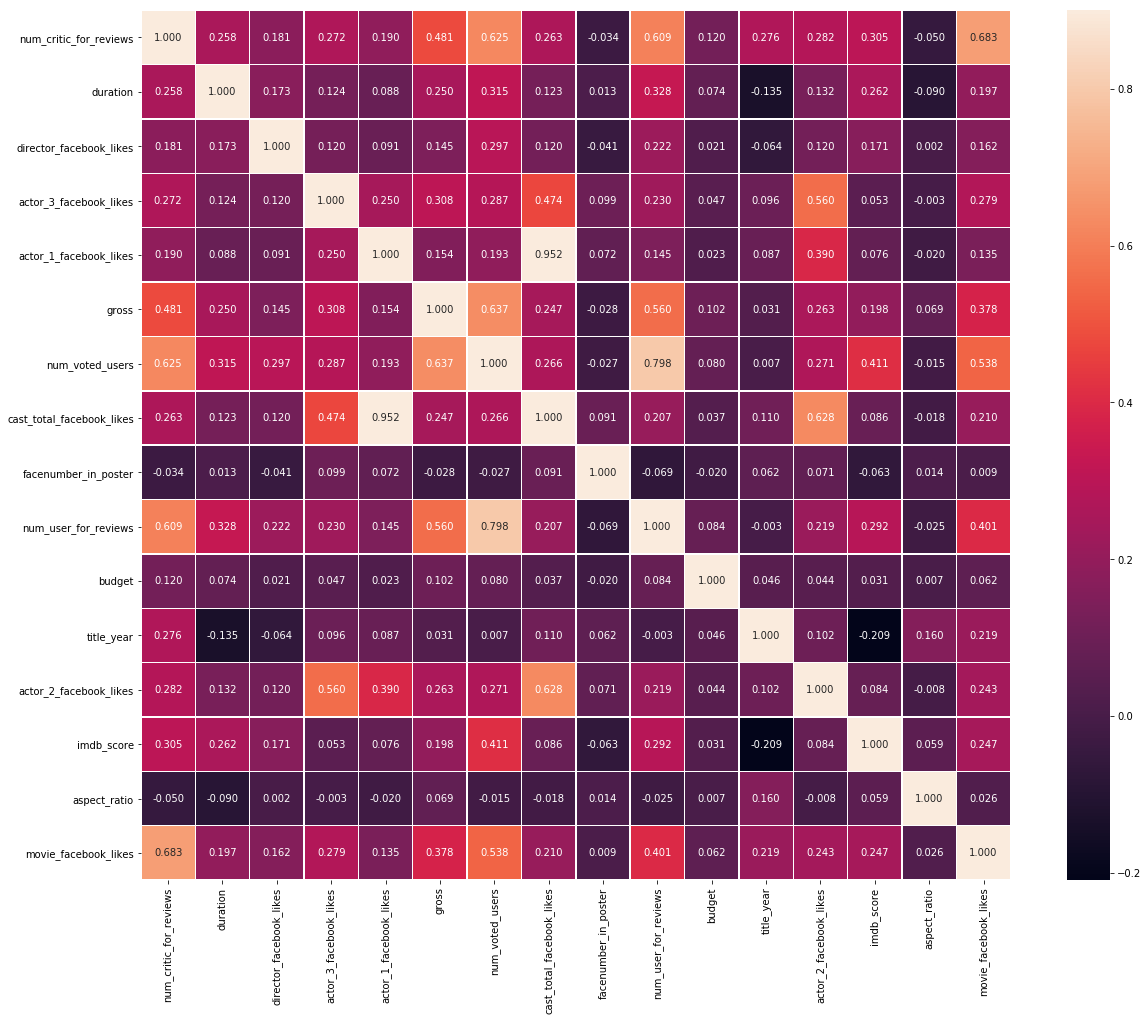

In [21]:
corr_map = raw_data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corr_map, vmax=0.9, square=True, fmt = '.3f', annot = True, linewidths = .5)

Here, light color indicates high correlation, and dark color indicates low correlation. We can ignore the white diagonal line, because it's the correlation between the same variables, which must be 1.

## Data Preprocessing

### Data cleaning for numerical data
we will not consider the features with low correlation to imdb score based on heap map above

we will drop following columns

In [22]:
to_drop = corr_map.imdb_score[corr_map.imdb_score < 0.2].index.tolist()

In [23]:
print(to_drop)

['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio']


In [24]:
data = raw_data.drop(to_drop, axis = 1)

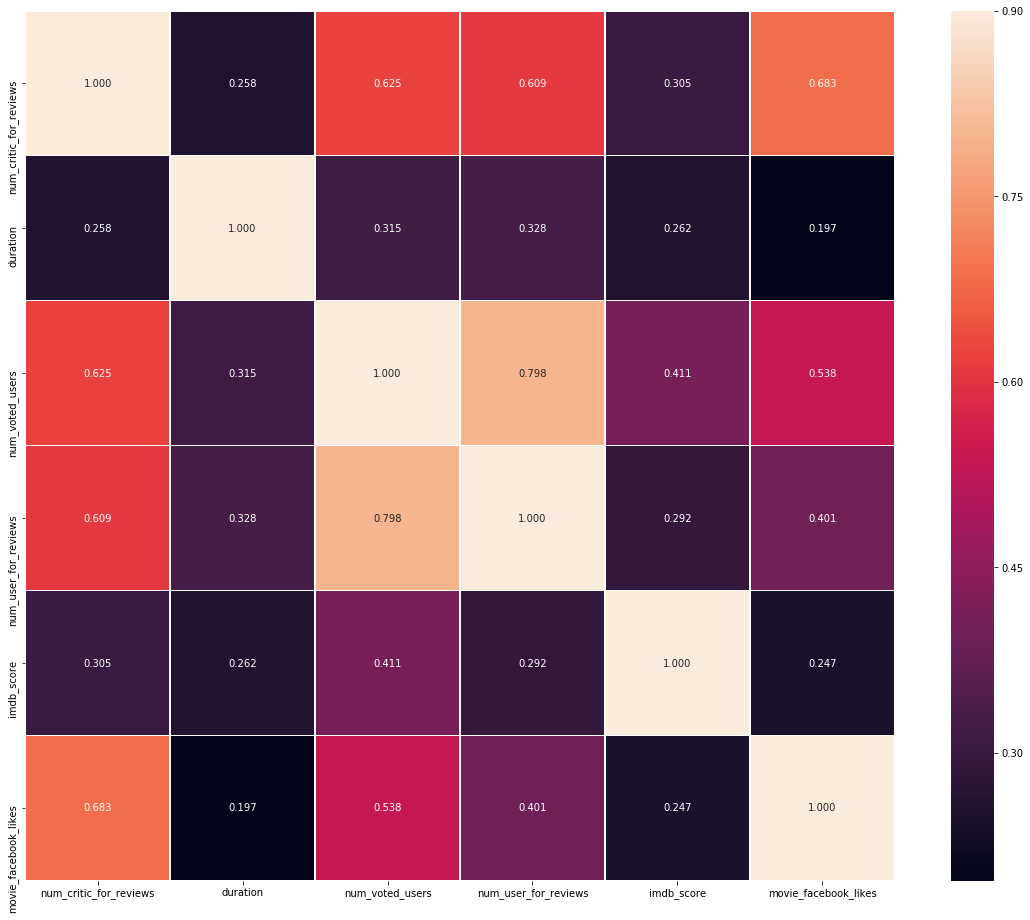

In [25]:
corr_map = data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corr_map, vmax=0.9, square=True, fmt = '.3f', annot = True, linewidths = .5)

### Data cleaning for categorical data

In [26]:
###TODO###

### Null value
note that we have null value in our dataset, we need to elimunate the null values. <br>
to proceed this process, we will impute null value with different decision based on different features

In [27]:
data.isnull().mean()

color                     0.003768
director_name             0.020623
num_critic_for_reviews    0.009915
duration                  0.002974
actor_2_name              0.002578
genres                    0.000000
actor_1_name              0.001388
movie_title               0.000000
num_voted_users           0.000000
actor_3_name              0.004561
plot_keywords             0.030339
movie_imdb_link           0.000000
num_user_for_reviews      0.004164
language                  0.002380
country                   0.000991
content_rating            0.060083
imdb_score                0.000000
movie_facebook_likes      0.000000
dtype: float64

In [28]:
# Note that director name, actor_2_name, actor_1_name, actor_3_name are unique names, which will influence our
# prediction if we simply impute from distribution. What we will choose here will be inpute with distinguish name
# "None"

In [29]:
for i in ['director_name','actor_2_name','actor_1_name', 'actor_3_name']:
    data[i] = data[i].apply(lambda x: 'None' if pd.isnull(x) else x)

In [30]:
# For other features we will impute the null data from distribution.

In [31]:
data = data.apply(lambda x: x.apply(lambda y: x.dropna().sample(1).iloc[0] if pd.isnull(y) else y))

In [32]:
data.isnull().mean()

color                     0.0
director_name             0.0
num_critic_for_reviews    0.0
duration                  0.0
actor_2_name              0.0
genres                    0.0
actor_1_name              0.0
movie_title               0.0
num_voted_users           0.0
actor_3_name              0.0
plot_keywords             0.0
movie_imdb_link           0.0
num_user_for_reviews      0.0
language                  0.0
country                   0.0
content_rating            0.0
imdb_score                0.0
movie_facebook_likes      0.0
dtype: float64

# Descriptive Analysis

    - Size
    - Missingness
    - Shape
    - Central Tendency
    - Variability
    

# Size 


In [33]:
raw_data.shape

(5043, 28)

# Missingness

In [34]:
empty_rows = raw_data.isnull().any(axis=1)
raw_data[empty_rows].shape

(1287, 28)

In [35]:
# columns with missing value
raw_data.columns[raw_data.isnull().any(axis=0)]

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

In [36]:
# Here is the number of missing values by column
raw_data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Individual variable 



6.442137616498111


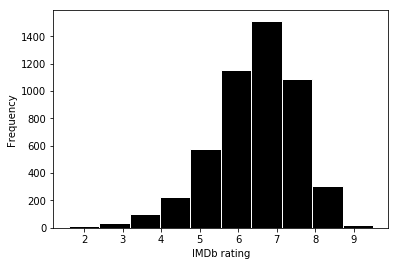

In [37]:
data['imdb_score'].plot(kind='hist',bins=10,color='black',edgecolor='white')
plt.xlabel('IMDb rating')

print(data['imdb_score'].mean())
#Average rating of the data




107.2010739856802


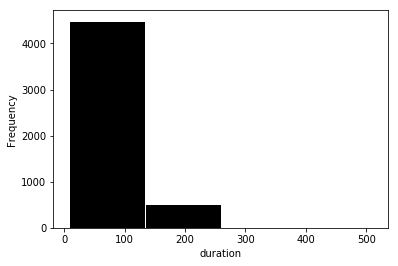

In [38]:
raw_data['duration'].plot(kind='hist',bins=4,color='black',edgecolor='white')
plt.xlabel('duration')
print(raw_data['duration'].mean())

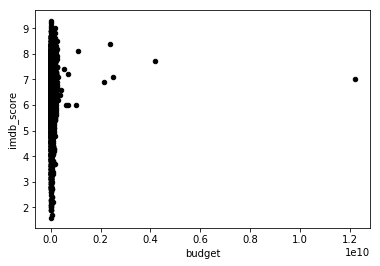

In [39]:

#raw_data.plot.scatter('imdb_score','budget')
raw_data.plot.scatter('budget','imdb_score',color='black')



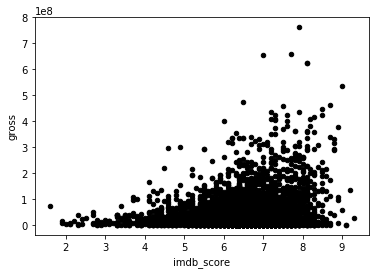

In [40]:
raw_data.plot.scatter('imdb_score','gross',color='black')

In [81]:
USA = data[data['country'].str.contains('USA')]
UK = data[data['country'].str.contains('UK')]
Australia = data[data['country'].str.contains('Australia')]
Canada = data[data['country'].str.contains('Canada')]
China = data[data['country'].str.contains('China')]
France= data[data['country'].str.contains('France')]
Germany = data[data['country'].str.contains('Germany')]
India = data[data['country'].str.contains('India')]
Italy = data[data['country'].str.contains('Italy')]
Japan = data[data['country'].str.contains('Japan')]
Mexico = data[data['country'].str.contains('Mexico')]
New_Zealand = data[data['country'].str.contains('New Zealand')]
South_Africa= data[data['country'].str.contains('South Africa')]
Spain = data[data['country'].str.contains('Spain')]


print('USA = ' , USA['imdb_score'].mean() )
print('UK = ' ,  UK['imdb_score'].mean() )
print('Australia = ' , Australia['imdb_score'].mean() )
print('Canada = ' , Canada['imdb_score'].mean() )
print('China = ' , China['imdb_score'].mean() )
print('France = ' ,France['imdb_score'].mean() )
print('Germany = ' ,  Germany['imdb_score'].mean() )
print('Spain = ' ,  Spain['imdb_score'].mean() )
print('India = ' ,  India['imdb_score'].mean() )
print('Italy = ' , Italy['imdb_score'].mean() )
print('Japan = ' ,  Japan['imdb_score'].mean() )
print('Mexico = ' ,  Mexico['imdb_score'].mean() )
print('New Zealand = ' , New_Zealand['imdb_score'].mean() )
print('South_Africa = ' , South_Africa['imdb_score'].mean() )



USA =  6.367803726056153
UK =  6.8183035714285705
Australia =  6.5145454545454555
Canada =  6.161904761904762
China =  6.623333333333332
France =  6.678571428571429
Germany =  6.367999999999996
Spain =  6.8242424242424224
India =  6.532352941176472
Italy =  6.873913043478259
Japan =  6.952173913043477
Mexico =  6.776470588235294
New Zealand =  7.268749999999999
South_Africa =  6.4375


In [82]:
data['country'].value_counts()


USA                     3811
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Mexico                    17
Hong Kong                 17
New Zealand               16
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
Norway                     8
Brazil                     8
South Africa               8
Sweden                     6
Thailand                   5
Poland                     5
Netherlands                5
Iran                       4
Israel                     4
Romania                    4
Belgium                    4
Argentina                  4
                        ... 
Taiwan                     2
Greece                     2
Colombia                   1
Libya         

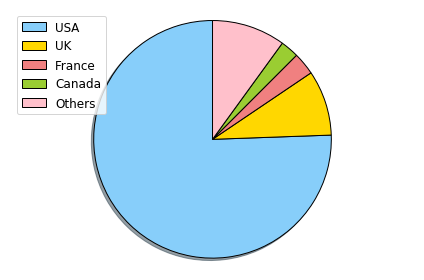

In [83]:
labels = 'USA','UK','France','Canada','Others'
sizes =[3811,448,154,126,504]
colors = ['lightskyblue','gold','lightcoral','yellowgreen','pink']
patches, texts = plt.pie(sizes,colors=colors,shadow=True,startangle=90,
wedgeprops={"edgecolor":"0", 'linewidth':1,
            'linestyle':'solid','antialiased':True })
plt.legend(patches,labels,loc="best",fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()




